In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data



In [2]:
start = '2010-01-01'
end ='2019-12-31'


In [4]:
df = pd.read_csv('/content/AAPL (1).csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/AAPL (1).csv'

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3224,2022-10-24,147.190002,150.229996,146.000000,149.449997,149.202484,75981900
3225,2022-10-25,150.089996,152.490005,149.360001,152.339996,152.087708,74732300
3226,2022-10-26,150.960007,151.990005,148.039993,149.350006,149.102661,88194300
3227,2022-10-27,148.070007,149.050003,144.130005,144.800003,144.560196,109180200
3228,2022-10-28,148.199997,157.500000,147.820007,155.740005,155.482086,164762400


In [ ]:
df = df.drop(['Date','Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


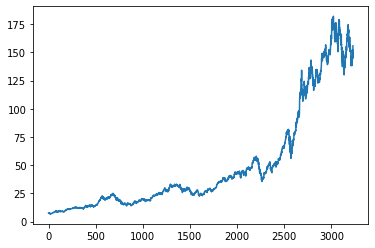

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3224    151.2160
3225    151.2273
3226    151.2670
3227    151.2536
3228    151.3239
Name: Close, Length: 3229, dtype: float64

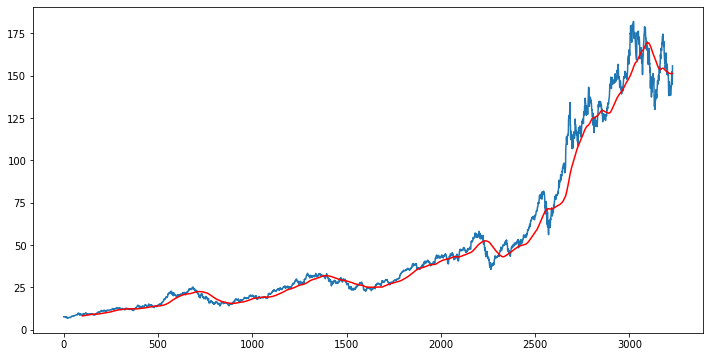

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')


In [ ]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3224    157.20640
3225    157.10725
3226    156.99305
3227    156.84165
3228    156.74270
Name: Close, Length: 3229, dtype: float64

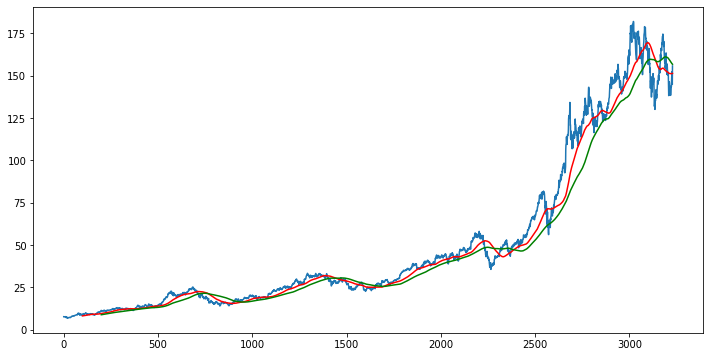

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3229, 5)

In [ ]:
#splitng data in to training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #70% data is used in training
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))]) #30% data is used in testing
print(data_training.shape)
print(data_testing.shape)

(2260, 1)
(969, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2260,39.292500
2261,39.037498
2262,39.057499
2263,39.435001
2264,39.480000


In [ ]:
from sklearn.preprocessing import MinMaxScaler      #### for LSTM model we have to scale down the data between 0 and 1 , clsing prices ka data 0 na d1 k beech
scaler = MinMaxScaler(feature_range=(0,1)) 

In [ ]:
data_training_array = scaler.fit_transform(data_training)       ### fitting the training data to scaler
data_training_array

array([[0.01533047],
       [0.01558879],
       [0.01320823],
       ...,
       [0.63231965],
       [0.60251036],
       [0.58345199]])

In [ ]:
data_training_array.shape

(2260, 1)

In [ ]:
x_train = []
y_train = []  #define two  empty list

for i in range(100, data_training_array.shape[0]) :
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i , 0])

#x_train             #####  use to see x_train  

###  now we have to convert x_train and y_train to numpy arrays to provide these data to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
from keras.layers import Dense , Dropout , LSTM            #########    ML MODEL
from keras.models import Sequential


In [ ]:
from pandas.core.arrays.datetimes import sequence_to_datetimes
model = Sequential()
model.add(LSTM(units =50 ,activation ='relu' ,return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60 ,activation ='relu' ,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80 ,activation ='relu' ,return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120 ,activation ='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units =1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer ='adam' ,loss = 'mean_squared_error')
model.fit(x_train ,y_train , epochs =50)

Epoch 1/50
68/68 [==============================] - 29s 322ms/step - loss: 0.0304
Epoch 2/50
68/68 [==============================] - 22s 319ms/step - loss: 0.0076
Epoch 3/50
68/68 [==============================] - 23s 345ms/step - loss: 0.0055
Epoch 4/50
68/68 [==============================] - 22s 325ms/step - loss: 0.0054
Epoch 5/50
68/68 [==============================] - 22s 323ms/step - loss: 0.0062
Epoch 6/50
68/68 [==============================] - 22s 321ms/step - loss: 0.0047
Epoch 7/50
68/68 [==============================] - 22s 322ms/step - loss: 0.0046
Epoch 8/50
68/68 [==============================] - 22s 324ms/step - loss: 0.0048
Epoch 9/50
68/68 [==============================] - 22s 325ms/step - loss: 0.0040
Epoch 10/50
68/68 [==============================] - 22s 322ms/step - loss: 0.0039
Epoch 11/50
68/68 [==============================] - 22s 327ms/step - loss: 0.0035
Epoch 12/50
68/68 [==============================] - 22s 321ms/step - loss: 0.0036
Epoch 13/50
6

In [ ]:
model.save('kereas_model.h5')

In [ ]:
#for pridicting the value :: (30%)testing data

data_testing.head()

,Close
2260,39.292500
2261,39.037498
2262,39.057499
2263,39.435001
2264,39.480000


In [ ]:
data_training.tail(100)

,Close
2160,51.847500
2161,51.997501
2162,52.267502
2163,51.777500
2164,51.812500
...,...
2255,41.517502
2256,40.222500
2257,39.207500
2258,37.682499


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
#df =dataframe , here we connecting the datatraining and data testing ::
final_df = past_100_days.append(data_testing , ignore_index=True)

In [ ]:
final_df.head()

,Close
0,51.847500
1,51.997501
2,52.267502
3,51.777500
4,51.812500


In [ ]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.11129128],
       [0.11231544],
       [0.11415893],
       ...,
       [0.77700783],
       [0.74594184],
       [0.82063674]])

In [ ]:
input_data.shape

(1069, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i , 0])

In [ ]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(969, 100, 1)
(969,)


In [ ]:
#making predictions
y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 90ms/step


In [ ]:
y_predicted.shape

(969, 1)

In [ ]:
y_test

array([0.02556968, 0.02382861, 0.02396517, 0.02654263, 0.02684987,
       0.        , 0.010361  , 0.00979771, 0.01461124, 0.01898095,
       0.01981736, 0.01723989, 0.01333105, 0.01857131, 0.02176325,
       0.02333361, 0.02497227, 0.0189639 , 0.02002218, 0.01793973,
       0.02657676, 0.02408466, 0.02131943, 0.03936161, 0.04139285,
       0.0415294 , 0.04960314, 0.0546044 , 0.05470684, 0.049074  ,
       0.04816933, 0.04649652, 0.04898864, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093453, 0.04927881, 0.05253904,
       0.05468976, 0.05486045, 0.05578219, 0.05284627, 0.05595288,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266107, 0.06609201, 0.06745755, 0.07090551, 0.07498505,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.0794572 , 0.07612868, 0.07899633, 0.07942306, 0.08152256,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674

In [ ]:
y_predicted

array([[0.11153311],
       [0.10994378],
       [0.10834278],
       [0.10676758],
       [0.10525975],
       [0.10385567],
       [0.10252349],
       [0.10123044],
       [0.09997177],
       [0.09875774],
       [0.09761849],
       [0.09658438],
       [0.09566915],
       [0.09486526],
       [0.09416094],
       [0.09356925],
       [0.09309959],
       [0.09275657],
       [0.09252617],
       [0.09238009],
       [0.09229353],
       [0.09225619],
       [0.092271  ],
       [0.09232286],
       [0.09242958],
       [0.09264058],
       [0.09297897],
       [0.09346683],
       [0.0941267 ],
       [0.09496573],
       [0.09596127],
       [0.09706438],
       [0.09822091],
       [0.09938359],
       [0.10051352],
       [0.1015798 ],
       [0.10256071],
       [0.10344356],
       [0.10422888],
       [0.10491881],
       [0.1055257 ],
       [0.1060735 ],
       [0.10658418],
       [0.10707593],
       [0.1075516 ],
       [0.10801585],
       [0.10847904],
       [0.108

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale_factor = 1/0.02044989
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

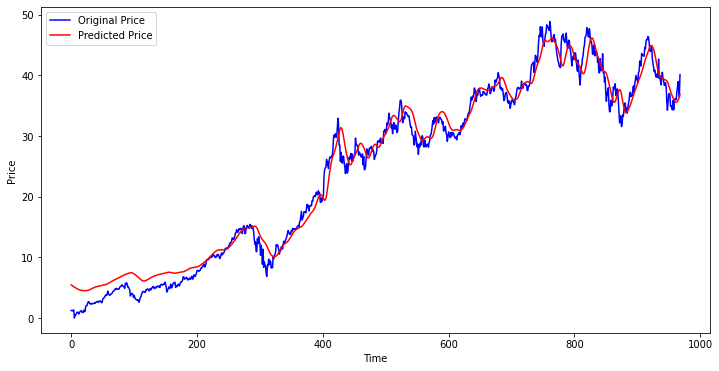

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_predicted , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()